In [187]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from custom_defs import *
sns.set_style('darkgrid')
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)


In [188]:
def get_bins(df,kolom):
    rang = df[kolom].max()-df[kolom].min()
    bins = (rang/(np.sqrt(df[kolom].count())))
    bins = np.arange(df[kolom].min(), df[kolom].max(), bins)
    return bins

def distplot(df,kolom):
    bins = get_bins(df,kolom)
    sns.distplot(x=df[kolom], bins=bins, kde=False)
    plt.title(f'Grafiek van {kolom}')
    plt.xlabel(kolom)
    plt.show()

# <span style="color:darkorange"> Labo 03 Centrum- & spreidingsmaten in python demo

## <span style="color:deeppink"> Inlezen van een dataset en deze verkennen </span>
Het inlezen van een csv-file gaan we doen met een built
-in functie van de pandas library.<br/> Deze functie is: <br/>
`pd.read_csv(path/to/file)` <br/>
Indien je file titels heeft, moet je aan de parameter `header` meegeven in welke lijn van het bestand de titels zich bevinden. <br/> Voor meer uitleg over de dataset zelf: https://archive.ics.uci.edu/ml/datasets/heart+Disease  

Laad de dataset `heart.csv` in en sla deze op onder de variabelenaam df

In [189]:
df = pd.read_csv('heart.csv')

Om te zien of het inlezen van de data correct gelukt is kun je gebruik maken van de functie:<br/>`df.head()` </br> deze functie zal de eerste 5 lijntjes afdrukken, of meer indien je het aantal meegeeft als parameter:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [190]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Om een samenvatting te krijgen van de belangrijkste statistische parameters van de kolommen die bestaan uit kwantitatieve gegevens, kun je gebruik maken van de functie: <br> `df.describe()` <br>
<span style="color:violet"> **Link naar de documentatie:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html <br>
<span style="color:violet"> **Link naar filmpje met uitleg:** https://www.youtube.com/watch?v=g2OpfqWi2tM



In [191]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


De functie `df.shape` toont het aantal rijen en het aantal kollomen die in de dataframe aanwezig zijn. <br>
<span style="color:violet"> **Link naar de documentatie:** https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html <br>
<span style="color:violet"> **Link naar filmpje met uitleg:** https://www.youtube.com/watch?v=FSrmqInUcQM




In [192]:
df.shape

(303, 14)

Het aantal rijen kan je selecteren door middel van: `df.shape[0]`

In [193]:
df.shape[0]

303

Analoog kan je het aantal kolommen selecteren mbv: `df.shape[1]`

In [194]:
df.shape[1]

14

## <span style="color:deeppink">Selecteren kolom

Je kan een kolom selecteren uit een dataframe met `df['kolomnaam']` Hier zullen we dit eens proberen met de kolom age. (je hoeft de kolom niet op te slaan in een variabele)

In [195]:
df['age']

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
30     41
31     65
32     44
33     54
34     51
35     46
36     54
37     54
38     65
39     65
40     51
41     48
42     45
43     53
44     39
45     52
46     44
47     47
48     53
49     53
50     51
51     66
52     62
53     44
54     63
55     52
56     48
57     45
58     34
59     57
60     71
61     54
62     52
63     41
64     58
65     35
66     51
67     45
68     44
69     62
70     54
71     51
72     29
73     51
74     43
75     55
76     51
77     59
78     52
79     58
80     41
81     45
82     60
83     52
84     42
85     67
86     68
87     46
88     54
89     58
90     48
91     57
92     52
93     54
94     45
95     53
96     62
97     52
98     43
99     53


Een alternatieve manier van het selecteren van een kolom is: `df.kolomnaam` dit werkt echter enkel met een kolomnaam zonder spaties.

In [196]:
df.age

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
30     41
31     65
32     44
33     54
34     51
35     46
36     54
37     54
38     65
39     65
40     51
41     48
42     45
43     53
44     39
45     52
46     44
47     47
48     53
49     53
50     51
51     66
52     62
53     44
54     63
55     52
56     48
57     45
58     34
59     57
60     71
61     54
62     52
63     41
64     58
65     35
66     51
67     45
68     44
69     62
70     54
71     51
72     29
73     51
74     43
75     55
76     51
77     59
78     52
79     58
80     41
81     45
82     60
83     52
84     42
85     67
86     68
87     46
88     54
89     58
90     48
91     57
92     52
93     54
94     45
95     53
96     62
97     52
98     43
99     53


Wat als je nu een kolom opvraagt die niet bestaat? Probeer de kolom 'data.weight' te selecteren uit de dataset.

In [197]:
# df.weight

Er zijn nog meer manieren hoe je data kan halen uit je dataset, indien je interesse zou hebben in hoe je moet werken met deze dataframes en hoe je data kan selecteren uit de dataframe kan je zelfstandig al eens deze link bekijken:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

## <span style="color:deeppink"> Aantal waarden in een kolom tellen
Wat als je wil kijken welke waarden er aanwezig zijn in een kolom en hoe vaak deze voorkomen? Hiervoor kun je gebruik maken van de functie `kolom.value_counts()` <br>
<span style="color:violet"> **Link naar de documentatie:** https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html <br>
<span style="color:violet"> **Link naar filmpje met uitleg:** https://www.youtube.com/watch?v=0_HAwyujXaE



In [198]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

## <span style="color:deeppink"> Specifieke waarden uit de kolom halen
Nu je weet hoe je een kolom kunt selecteren, zou je bv graag weten wat de maximum waarde van deze kolom is. <br/> Hoewel je zou kunnen kijken in `df.describe()` is het niet zo eenvoudig om daar de effectieve waarde uit te halen om eventueel later deze berekeningen mee uit te voeren. <br/> Met de functie `df[column name].max()` kun je het maximum berekenen.<br/> Analoog kan je ook het minimum (`min()`), het aantal (`count()`), gemiddelde(`mean()`), mediaan(`median()`),.... berekenen  
bereken nu het maximum van de age kolom

In [199]:
print(df['age'].max())
print(df['age'].min())
print(df['age'].count())
print(df['age'].mean())
df['age'].median()

77
29
303
54.366336633663366


55.0

# <span style="color:deeppink"> Data filteren
We gaan nu kijken hoeveel hartpatienten er aanwezig zijn in de dataset door eerst te filteren aan de hand van target, en dan het aantal op te vragen met de functie count

De eerste stap is een series aanmaken waar er True verschijnt als een kolom aan de voorwaarde voldoet en False indien het niet voldoet, dit kan je doen door de kolom te selecteren en er een conditie aan te koppelen. <br>
Bv: `df.age >= 60` of `df['cp'] == 2`. <br>
We willen alle hartpatienten, wat wil zeggen dat de target gelijk moet zijn aan 1.

In [200]:
df['age'] >=60
df['cp'] ==2

0      False
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8       True
9       True
10     False
11      True
12     False
13     False
14     False
15      True
16      True
17     False
18     False
19     False
20     False
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28      True
29      True
30     False
31     False
32     False
33      True
34     False
35      True
36      True
37      True
38      True
39      True
40      True
41     False
42     False
43     False
44      True
45     False
46      True
47      True
48      True
49     False
50      True
51     False
52      True
53      True
54      True
55     False
56     False
57     False
58     False
59     False
60      True
61     False
62     False
63     False
64      True
65     False
66      True
67     False
68     False
69     False
70      True
71      True
72     False
73     False
74      True
75     False
76      True

Je kan nu deze series gebruiken om de dataset mee te filteren. Dit doe je door de dataset op te roepen, en dan de voorwaarde tussen vierkante haakjes te plaatsen. Je kunt dit rechtsreeks tussen vierkante haakjes plaatsen: <br>
df[df.age >= 60] <br>
of je kunt ook een tussenstap gebruiken en deze voorwaarde eerst opslaan als een variabele en dan deze varable tussen de vierkante haakjes oproepen: <br>
voorwaarde = df.age >= 60 <br>
df[voorwaarde] <br>

Doe dit nu zelf voor alle hartpatienten


In [201]:
x = df.age >60
x

0       True
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13      True
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23      True
24     False
25      True
26     False
27     False
28      True
29     False
30     False
31      True
32     False
33     False
34     False
35     False
36     False
37     False
38      True
39      True
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51      True
52      True
53     False
54      True
55     False
56     False
57     False
58     False
59     False
60      True
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69      True
70     False
71     False
72     False
73     False
74     False
75     False
76     False

Nu hebben we de volledige dataset met alle hartpatienten. We willen nu opnieuw een kolom gaan selecteren met: `.kolomnaam` na de functie waar je de dataset oproept te plaatsen: <br>
df[voorwaarde].age

Doe dit nu voor de target kolom.

In [202]:
df[x].target

0      1
13     1
17     1
19     1
23     1
25     1
28     1
31     1
38     1
39     1
51     1
52     1
54     1
60     1
69     1
85     1
86     1
96     1
102    1
105    1
106    1
110    1
112    1
120    1
127    1
129    1
137    1
139    1
143    1
144    1
145    1
150    1
151    1
152    1
153    1
165    0
166    0
167    0
168    0
177    0
181    0
182    0
197    0
198    0
199    0
203    0
204    0
211    0
213    0
216    0
217    0
218    0
220    0
222    0
225    0
226    0
229    0
233    0
234    0
238    0
240    0
242    0
247    0
249    0
252    0
253    0
258    0
260    0
263    0
265    0
271    0
272    0
279    0
284    0
290    0
293    0
295    0
296    0
300    0
Name: target, dtype: int64

Nu kun je op de kolom bewerkingen uitvoeren zoals op een normale kolom (`.min()`, `.max()`, `.count()`,`sum()`)

Bereken nu het aantal in de target kolom

In [203]:
print(df['target'].min())
print(df['target'].max())
print(df['target'].count())
print(df['target'].sum())

0
1
303
165


Probeer dit nu zelf voor de volgende vraagjes:

Hoeveel mensen zijn ouder dan 70?

In [204]:
df[df['age']>70].age.count()

6

Is de oudste patient een hartpatient?

In [205]:
y = df['age'].max()
df[df['age']>=y].target

238    0
Name: target, dtype: int64

## <span style="color:deeppink"> Centrummaten en spreidingsmaten van de leeftijd

Bereken het gemiddelde, mediaan, variantie, standaardafwijking, Q1 (hint: gebruik de functie quantile), Q3, IQR, variatiebreedte (== range), de scheefheid en de piekvormigheid van de kolom `age`. 

<span style="color:violet"> **Link naar de documentatie:** https://pandas.pydata.org/docs/reference/series.html

In [206]:
df['age'].mean()
df['age'].median()
df['age'].var()
df['age'].std()
df['age'].quantile(0.25)
df['age'].quantile(0.75)
df['age'].quantile(0.75)-df['age'].quantile(0.25)
rang = df['age'].max()-df['age'].min()
df['age'].skew()
df['age'].kurt()

-0.5421671409908408

## <span style="color:deeppink"> Histogram van de leeftijd
Vervolgens zullen we een histogram maken met behulp van matplotlib om de verdeling van de leeftijd van de patienten weer te geven. Meer informatie over het plotten van een histogram en welke parameters aanwezig zijn kan je vinden via de volgende link: <br/> 
https://seaborn.pydata.org/generated/seaborn.displot.html

We starten met het berekenen van de klassenbreedte. <br> De klassenbreedte mag je opslaan onder de variabelenaam `bins`. <br>Om de vierkanstwortel te nemen van het aantal kun je de functie ` np.sqrt(aantal)` gebruiken

In [207]:
bins = (rang/(np.sqrt(df['age'].count())))
print(bins)



2.757527950182845


Vervolgens zullen we de klasses gaan berekenen met de functie: <br>
`np.arange(start, stop, step)` <br>
`start` is je minimum waarde <br>
`stop` is je maximum + de klassenbreedte (rond af indien nodig met de functie round()) <br>
`step` is de grootte van iedere individuele klasse, maw dit is je klassenbreedte <br>
<span style="color:violet"> **Link naar de documentatie:** https://numpy.org/doc/stable/reference/generated/numpy.arange.html

In [208]:
bins = np.arange(df['age'].min(), df['age'].max(), bins)
print(bins)
bins = get_bins(df,'age')
print(bins)

[29.         31.75752795 34.5150559  37.27258385 40.0301118  42.78763975
 45.5451677  48.30269565 51.0602236  53.81775155 56.5752795  59.33280745
 62.0903354  64.84786335 67.6053913  70.36291925 73.1204472  75.87797515]
[29.         31.75752795 34.5150559  37.27258385 40.0301118  42.78763975
 45.5451677  48.30269565 51.0602236  53.81775155 56.5752795  59.33280745
 62.0903354  64.84786335 67.6053913  70.36291925 73.1204472  75.87797515]


We zullen vervolgens de histogram zelf opstellen met de functie: `sns.displot()`
we zullen gebruik maken van de parameters:
`x` = de kolom van de dataset
`bins` = je klassenbreedte (die je al eerder zou moeten opgeslaan hebben onder de variabele bins.) <br>
`kde` = false. (kde is een lijnplot die standaard wordt toegevoegd aan een histogram, dit willen we niet)

Voeg een passende titel toe aan je grafiek met de functie: <br>
`plt.title("string met een passende titel)`

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


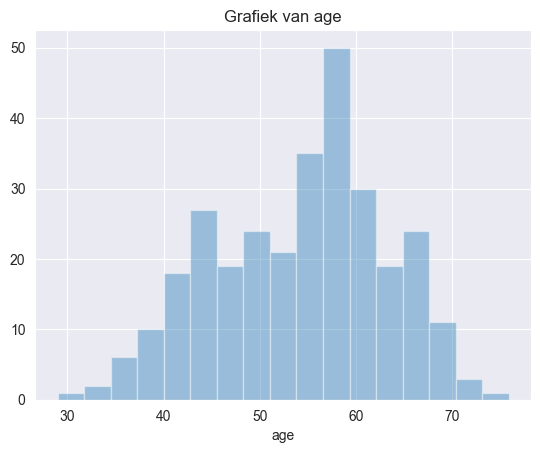

In [209]:

# sns.displot(x=df['age'], bins=bins, kde=False)
# plt.title('De leetijd')

distplot(df,'age')

<span style="color:violet"> **Filmpje met extra uitleg te vinden op leho**

## <span style="color:deeppink"> boxplot van de leeftijd </span>
We zullen nu een boxplot opstellen aan de hand van de functie: `sns.boxplot()` <br>
de argumenten die we gaan gebruiken zijn: <br>
`data` = de te gebruiken dataset
`x` = de te gebruiken kolom
`whis` = 1.5 (De whiskers moeten 1.5 keer de IQR zijn)

Teken nu de boxplot van de kolom leeftijd. Vergeet niet om de plot een titel te geven. <br>
<span style="color:violet"> **Link naar de documentatie:**
https://seaborn.pydata.org/generated/seaborn.boxplot.html 

Text(0.5, 1.0, 'Boxplot leeftijd')

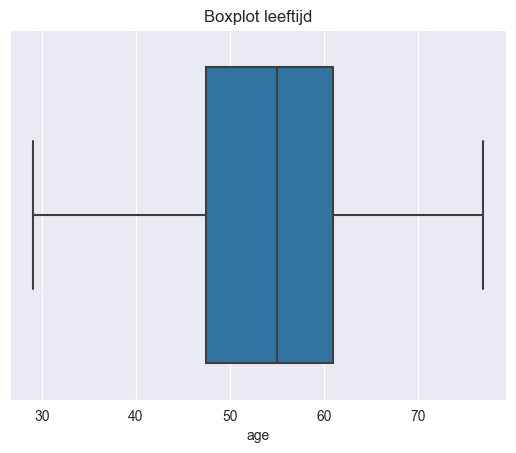

In [81]:
sns.boxplot(x=df['age'], whis=1.5)
plt.title('Boxplot leeftijd')

## <span style="color:deeppink"> boxplot van de leeftijd mannen vs vrouwen

Indien we de boxplot willen verdelen kunnen we met de parameter y meegeven hoe we de boxplot willen onderverdeeld zien. Probeer nu om de kolom geslacht (`sex`) mee te geven. 

Text(0.5, 1.0, 'Boxplot leeftijd')

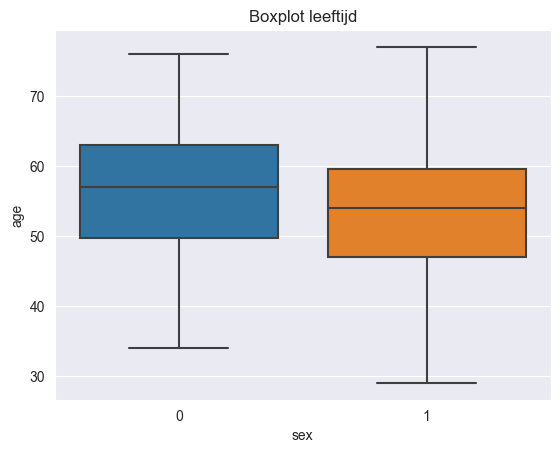

In [107]:
sns.boxplot(data=df, y='age',x='sex')
plt.title('Boxplot leeftijd')

We zien nu echter een bijkomend probleem, aangezien de geslachten in de dataset niet onderverdeeld zijn in man of vrouw maar 0 of 1, zorgt dit voor nietszeggende benoemingen in de x-as. We willen dus de `0` en `1` vervangen door `mannen` en `vrouwen`. <br>
dit kan aan de hand van de functie: `plt.xticks([lijst met te vervangen namen], [lijst met nieuwe namen]).

plot de functie opnieuw maar met de nieuwe naamgeving in de x-as

([<matplotlib.axis.XTick at 0x29072cd30>,
 [Text(0, 0, 'vrouw'), Text(1, 0, 'man')])

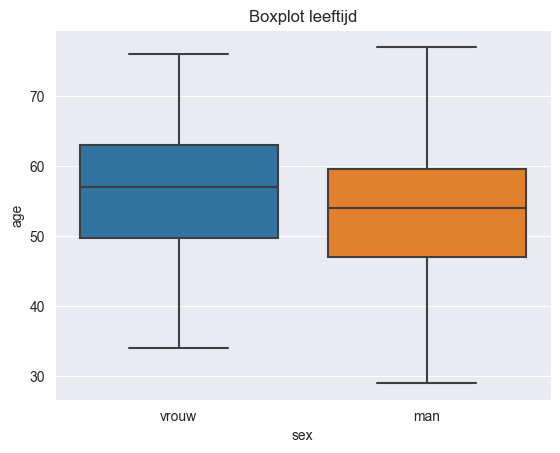

In [110]:
sns.boxplot(data=df, y='age',x='sex')
plt.title('Boxplot leeftijd')
plt.xticks([0,1],['vrouw','man'])

We zullen nu de verdeling tussen het aantal mannen en vrouwen bepalen. Vervolgens gaan we een staafdiagram maken met behulp van de Seaborn library (https://seaborn.pydata.org/api.html).

We moeten dus eerst de dataset opsplitsen in een dataset met alle mannen en dataset met alle vrouwen, we hebben dit al eerder gezien in deze les gezien hoe dit moet (dataset filteren aan de hand van een voorwaarde.) <br>

Maak een nieuwe voorwaarde aan voor de mannen en vrouwen en sla deze op onder een gepaste variabelenaam.

In [111]:
men = df['sex']==1
women = df['sex']==0

Selecteer uit de nieuwe dataset opgesteld aan de hand van de voorwaarden, de kolom met het geslacht en het aantal kun je selecteren met de functie `.count()`

In [115]:
print(df[men]['sex'].count())
print(df[women]['sex'].count())

207
96


We zullen nu een staafdiagram maken aan de hand van de functie `sns.catplot` <br>
Maak gebruik van de parameters:
`x` = de kolom
`data` = de te gebruiken dataset
`kind` = "count"

<span style ="color:violet"> **Link naar de documentatie:** https://seaborn.pydata.org/generated/seaborn.catplot.html

([<matplotlib.axis.XTick at 0x29373c970>,
 [Text(0, 0, 'vrouw'), Text(1, 0, 'man')])

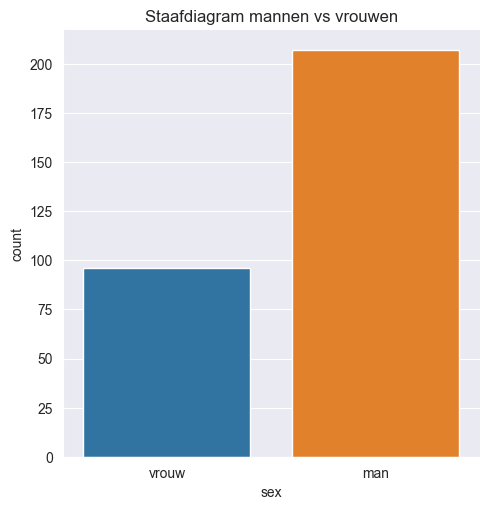

In [120]:
sns.catplot(data=df, x='sex',kind='count')
plt.title('Staafdiagram mannen vs vrouwen')
plt.xticks([0,1],['vrouw','man'])